<a href="https://colab.research.google.com/github/NatashaKamami/Python-Data-Analysis/blob/main/Food_carbon_footprint_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv')
data.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


**1. The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.**

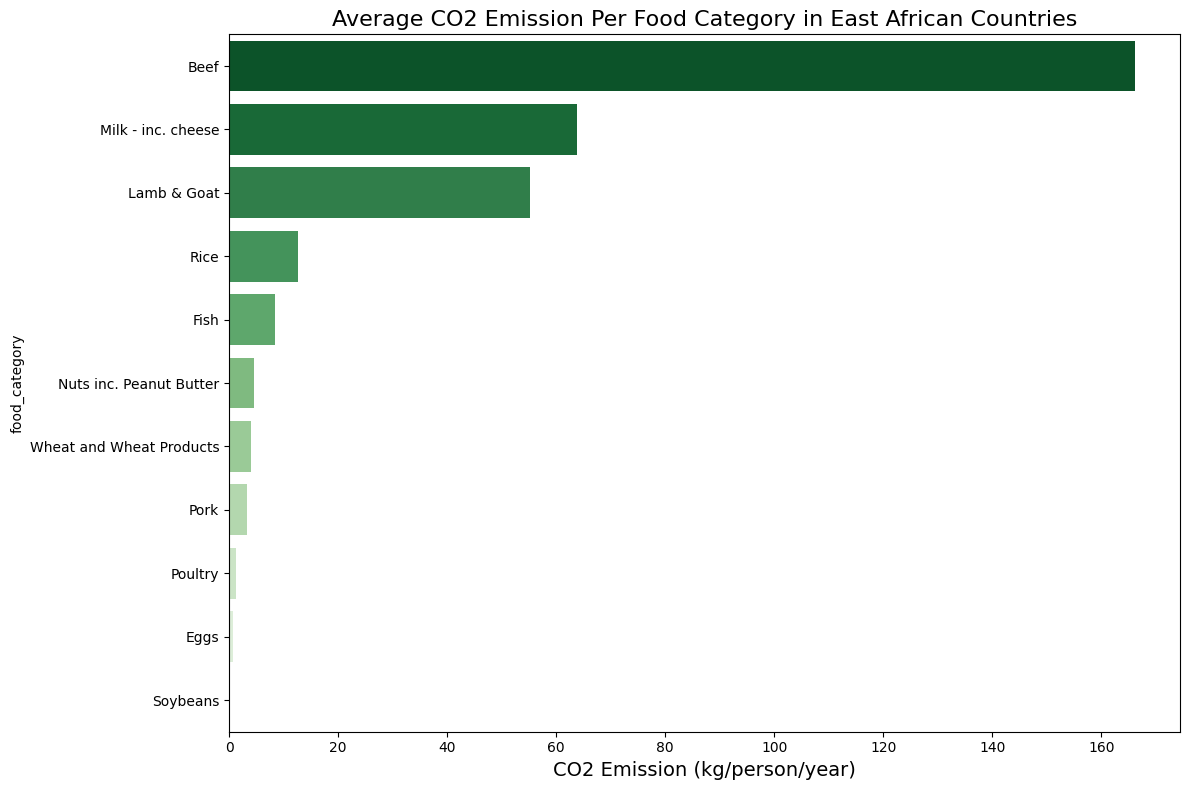

In [ ]:
# Filter data for East African countries and calculate the total emissions per food category
east_africa = data[data['country'].isin(['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia'])]
avg_emission = east_africa.groupby('food_category')['co2_emmission'].mean().reset_index()

# Sort the data in descending order
avg_emission = avg_emission.sort_values(by='co2_emmission', ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_emission, y='food_category', x='co2_emmission', hue='food_category', palette='Greens_r')

# Adding plot details
plt.title('Average CO2 Emission Per Food Category in East African Countries', fontsize=16)
plt.xlabel('CO2 Emission (kg/person/year)', fontsize=14)
plt.tight_layout()
plt.show()


The bar chart shows that beef, milk including cheese, and lamb and goat are the biggest contributors to CO2 emissions in East African countries. This highlights that animal-based foods are major sources of emissions in this region. The high emissions from these foods reflect their prevelance in the regional diet. With this information, policymakers and environmental groups can focus on these categories for mitigation strategies, such as promoting plant-based diets which produce fewer emissions. Governments and NGOs can also use this data to create educational campaigns to raise awareness about how reducing high-emission foods can benefit the environment.

**2. Highlighting the marked difference between consumption and emissions in Beef**

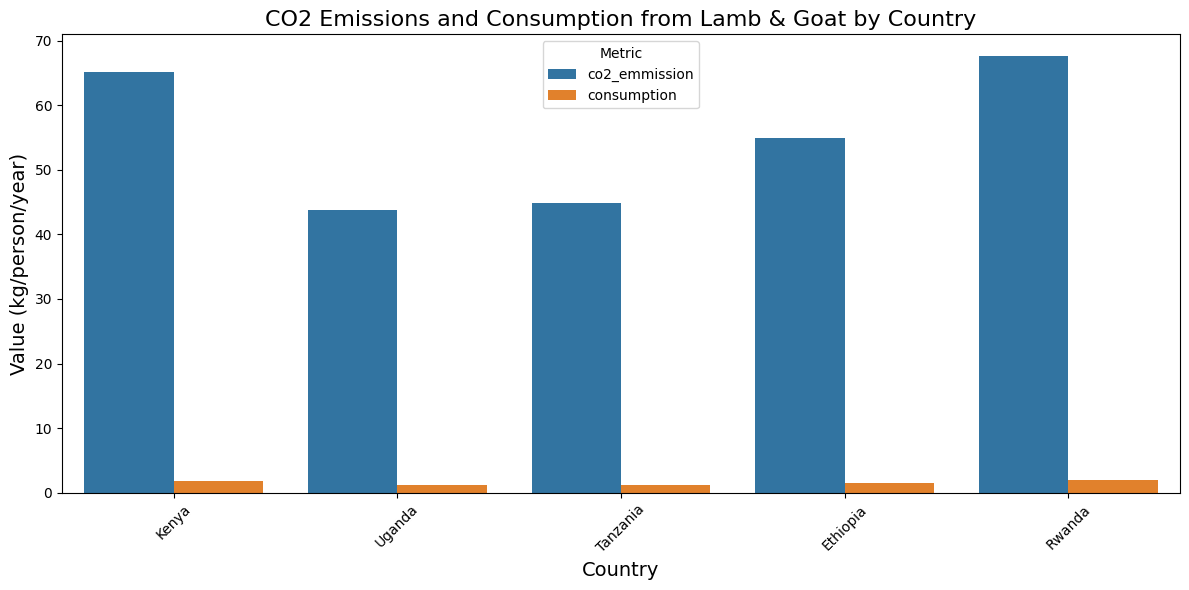

In [ ]:
lamb_data = east_africa[east_africa['food_category'] == 'Lamb & Goat']
lamb_data_melted = lamb_data.melt(id_vars=['country'], value_vars=['co2_emmission', 'consumption'],
                                  var_name='metric', value_name='value')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=lamb_data_melted, x='country', y='value', hue='metric')
plt.title('CO2 Emissions and Consumption from Lamb & Goat by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Value (kg/person/year)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

The graph shows CO2 emissions and lamb and goat consumption in East African countries. Rwanda and Kenya have the highest consumption likely due to cultural or economic reliance on lamb and goat. Higher consumption leads to higher CO2 emissions, showing a clear link between the two; more lamb and goat consumption means more environmental impact. These countries could therefore be the focus of efforts to reduce emissions. This could include promoting less environmentally harmful protein sources through encouraging shifts toward plant-based diets or supporting sustainable farming practices.However, the disparity between the distribution of consumption and the distribution of emissions i.e there is high consumption and not so high emissions, suggests more efficient production practices in East African region.


**3.The food consumption of animal and non-animal products and the impact on carbon footprint.**

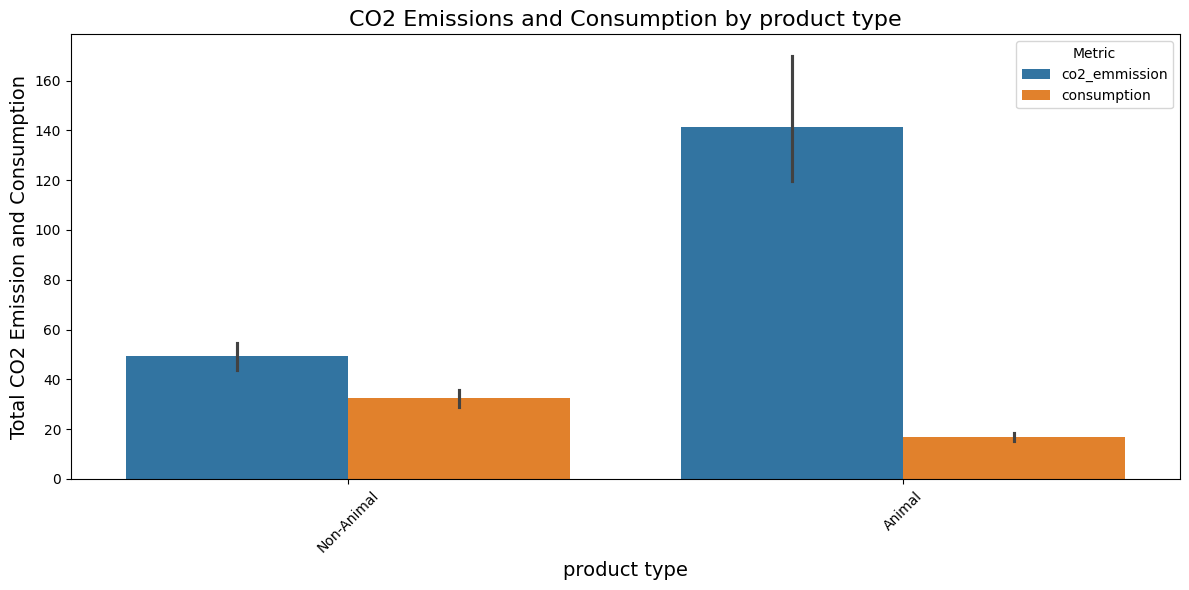

In [ ]:
# Categorize food into 'Animal' and 'Non-Animal' groups, then aggregate emissions and consumption by group
data['product_type'] = data['food_category'].apply(lambda x: 'Animal' if x in ['Beef', 'Poultry', 'Dairy', 'Fish'] else 'Non-Animal')
animal_vs_non_animal = data.groupby('product_type')[['co2_emmission', 'consumption']].sum().reset_index()

# Melt the data, INCLUDING the 'product_type' column
data_melted = data.melt(id_vars=['country', 'product_type'], value_vars=['co2_emmission', 'consumption'], var_name='metric', value_name='value')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=data_melted, x='product_type', y='value', hue='metric')
plt.title('CO2 Emissions and Consumption by product type', fontsize=16)
plt.xlabel('product type', fontsize=14)
plt.ylabel('Total CO2 Emission and Consumption', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

The graph compares CO2 emissions and consumption globally between animal and non-animal products. It shows that non-animal products are consumed more than animal products but have much lower CO2 emissions. This highlights the environmental efficiency of plant-based diets. In contrast, even small amounts of animal product consumption lead to significantly higher emissions. This is due to the high resource usage (feed, water, and land) that is required for animal farming and methane emissions from animals like cattle and sheep.
Since non-animal products are a more sustainable option with lower emissions, promoting their consumption could help reduce the food system’s carbon footprint. The high emissions from animal-based products also suggest that: Improving livestock farming practices, like better feed and waste management, can reduce emissions, shifting to plant-based alternatives can also significantly lower the environmental impact, research and funding for sustainable livestock practices as well as public awareness campaigns to show the environmental benefits of reducing animal product consumption all in an effort to reduce emissions.



**4. Beef's contribution to CO2 emissions (kg/person/year) worldwide**

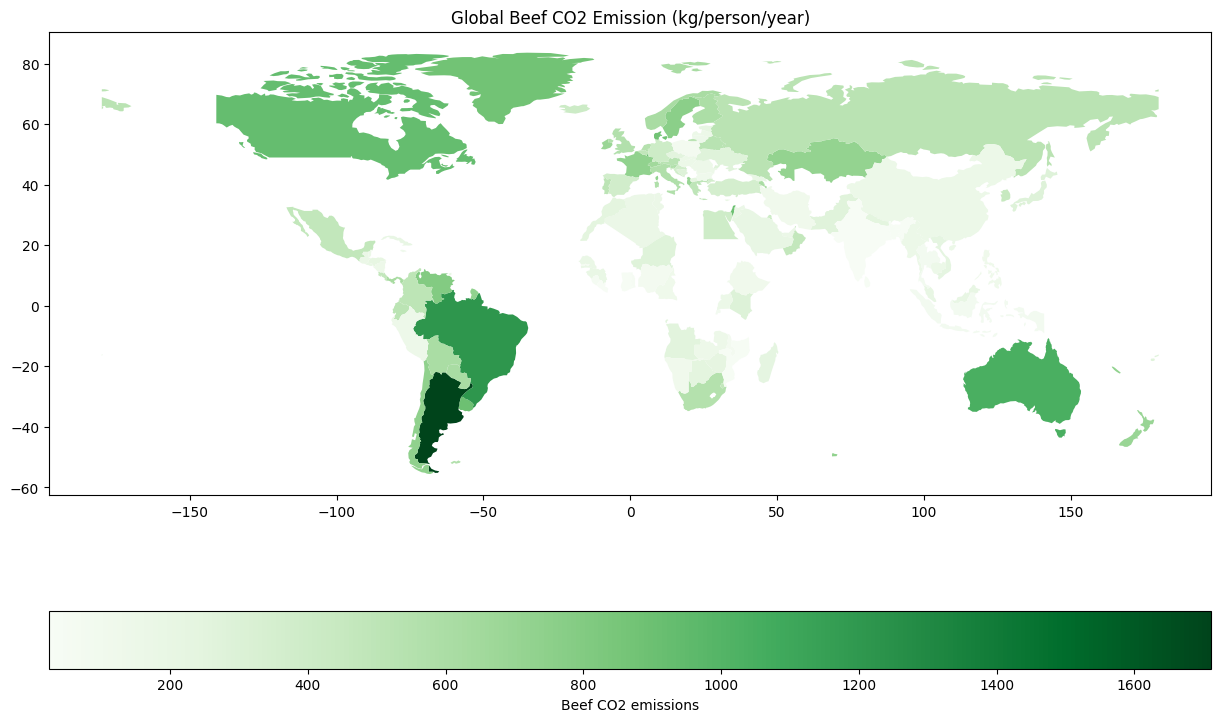

In [ ]:
# Map
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_sovereignty.geojson"
gdf = gpd.read_file(url)
beef_emission = data[data['food_category'] == 'Beef'][['country', 'co2_emmission']]
new_data=beef_emission.merge(gdf, how='inner', right_on='admin', left_on='country')
dropping = ['scalerank', 'labelrank', 'sovereignt', 'sov_a3', 'adm0_dif', 'level',
       'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit', 'gu_a3', 'su_dif',
       'subunit', 'su_a3', 'brk_diff', 'name', 'name_long', 'brk_a3',
       'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en', 'formal_fr',
       'note_adm0', 'note_brk', 'name_sort', 'name_alt', 'mapcolor7',
       'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est', 'gdp_md_est',
       'pop_year', 'lastcensus', 'gdp_year', 'economy', 'income_grp',
       'wikipedia', 'fips_10', 'iso_a2', 'iso_a3', 'iso_n3', 'un_a3', 'wb_a2',
       'wb_a3', 'woe_id', 'adm0_a3_is', 'adm0_a3_us', 'adm0_a3_un',
       'adm0_a3_wb', 'continent', 'region_un', 'subregion', 'region_wb',
       'name_len', 'long_len', 'abbrev_len', 'tiny', 'homepart',
       'featureclass']

new_data.drop(columns=dropping, inplace=True)
new_data = gpd.GeoDataFrame(new_data, geometry='geometry')

# Plotting
fig, ax=plt.subplots(1, 1, figsize=(15,10))
new_data.plot(column='co2_emmission', ax=ax, legend=True, cmap='Greens', legend_kwds={'label': "Beef CO2 emissions",
                                                                                         'orientation': "horizontal"})
plt.title("Global Beef CO2 Emission (kg/person/year)")
plt.show()


The map shows global beef-related CO2 emissions per person per year, highlighting the environmental impact of beef consumption. This information helps policymakers, environmental advocates, and the public see where action is needed to reduce emissions. Countries in South America, North America, and Australia have the highest amounts of emissions globally, reflecting their high beef consumption, large-scale livestock farming, and possibly inefficient production practices. In contrast, African countries have the lowest emissions, likely due to lower beef consumption, reliance on alternative protein sources like plants, or limited access to industrial beef production. In developed countries, high emissions are tied to cultural preferences for beef and its affordability from large-scale production while in developing countries, lower emissions may reflect economic challenges or diets based more on plant-based foods. Countries with the highest emissions are key targets for reducing the carbon footprint. Possible strategies include: Promoting sustainable beef farming methods, encouraging shifts toward plant-based protein sources, offering subsidies for plant-based food production and running education campaigns to promote reduced beef consumption. These actions can help reduce emissions and create more sustainable food systems.

**5.A box plot and interpretation of the CO2 contributions of food levels.**

In [ ]:
# Create a horizontal box plot using Plotly
fig = px.box(data, x='co2_emmission', y='food_category', orientation='h', color='food_category', title='Distribution of CO2 Emissions by Food Category', hover_data=['country'],
             category_orders={'food_category': sorted(data['food_category'].unique())})


# Customize layout
fig.update_layout(xaxis_title='CO2 Emission (kg CO2/person/year)', yaxis_title='Food Category', xaxis=dict(showgrid=True), yaxis=dict(showgrid=True),)
fig.show()


The box plot shows the CO2 emissions from different food categories. It highlights that animal-based foods, like beef and milk including cheese, generally produce much higher emissions than plant-based foods like soybeans and wheat. High-emission food categories with wide variability such as beef are important targets for action. This could involve promoting sustainable practices for these high-emission foods, or encouraging shifts to lower-emission options in diets. Outliers in certain food categories provide insights into inefficiencies or specific conditions in some countries. For example:  
Rice- Bangladesh and Vietnam are high outliers in this category.The two are among the top rice producers, have high yields due to advanced farming methods and irrigation systems.  
Beef- Argentina and Brazil are outliers with high emissions. Brazil is the world's largest beef exporter, much of its production occurs in deforested areas of the Amazon rainforest and this deforestation releases large amounts of CO2 reducing the forest’s ability to absorb carbon, compounding emissions.  
Argentina on the other hand has high beef consumption and relies heavily on extensive grazing systems, which often lead to overgrazing of grasslands. This depletes soil organic carbon and increases emissions.
These findings emphasize the need to focus on high-emission food categories through strategies like: Promoting sustainable production practices for beef and other animal-based foods, reducing deforestation and overgrazing to minimize environmental damage and encouraging dietary shifts toward plant-based foods with lower emissions. Highlighting high-emission food categories can therefore guide awareness campaigns and policy interventions to reduce their environmental impact and improve production efficiency.

**6. Top 10 Countries with highest emissions**

In [ ]:
# Calculate total CO2 emissions per country and food category and get the top 10 countries based on total CO2 emissions
category_emissions = data.groupby(['country', 'food_category'])['co2_emmission'].sum().reset_index()
top_countries = category_emissions.groupby('country')['co2_emmission'].sum().nlargest(10).reset_index()

# Merge top countries with category emissions for hover data
top_countries = pd.merge(top_countries, category_emissions, on='country', how='left')

# Create the bar chart
fig = px.bar(top_countries,x='co2_emmission_x', y='country', color='co2_emmission_x', title='Top 10 Countries by Food-Related CO2 Emissions',
             labels={'co2_emmission_x': 'Total CO2 Emission (kg/person/year)', 'country': 'Country', 'co2_emmission_y': 'Emission from the food category'},
             hover_data={'food_category': True,'co2_emmission_y': True})
fig.show()

The bar chart displays food-related CO2 emissions across the top 10 countries, highlighting the contributions of different food categories to the total emissions. Argentina ranks the highest in total emissions, with beef being its largest contributor. This is due to Argentina’s high per capita beef consumption, driven by cultural and economic reliance on beef, making it a major source of emissions. In contrast, Iceland’s highest contributor to CO2 emissions is lamb and goat. This is because of its traditional farming practices, methane emissions from ruminants like sheep and goats, and the challenges of managing farming in Iceland's small-scale, fragile ecosystem. The chart helps identify key areas for mitigation, such as targeting high-impact food categories. It also highlights opportunities for improving agricultural practices or encouraging dietary shifts toward lower-emission foods to reduce overall CO2 emissions.